In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import copy 
import pickle

import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table, Column, vstack, join

import palettable

cmap_1 = palettable.colorbrewer.sequential.Blues_7_r
cmap_2 = palettable.colorbrewer.sequential.OrRd_7_r
cmap_3 = palettable.colorbrewer.sequential.YlGn_7_r
cmap_4 = palettable.colorbrewer.sequential.Purples_7_r

cmap_list = [cmap_1, cmap_2, cmap_3, cmap_4]

color_bins = ["#377eb8", "#e41a1c", "#1b9e77", "#984ea3"]

In [2]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog

In [3]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Compare the outer envelope stellar mass and other halo mass proxies

#### DSigma profiles of HSC massive galaxies

In [14]:
# DeltaSigma profiles of HSC massive galaxies
topn_massive = pickle.load(open(os.path.join(res_dir, 'topn_galaxies_sum.pkl'), 'rb'))

#### DSigma profiles of mock galaxies

In [9]:
sim_dsig = Table.read(os.path.join(sim_dir, 'sim_merge_all_dsig.fits'))

#### Halo mass distributions

In [8]:
sim_mhalo = Table.read(os.path.join(sim_dir, 'sim_merge_mhalo_hist.fits'))

In [15]:
m100_dsig = topn_massive['logm_100']
mmax_dsig = topn_massive['logm_max']

m50_100_dsig = topn_massive['logm_50_100']
m50_150_dsig = topn_massive['logm_50_150']

/Users/song/Dropbox/work/submit/jianbing/jianbing/visual.py:473: RuntimeWarning: invalid value encountered in log10
  mod['r_mpc'], np.log10(ref_rand), fill_value='extrapolate')(r_mpc_obs)


Mean ratio in Bin 1: 0.961+/-0.182
Mean Mvir: 14.385 v.s. 14.326
Difference of Mvir in Bin 1: 0.058
Mean ratio in Bin 2: 0.866+/-0.127
Mean Mvir: 14.035 v.s. 13.863
Difference of Mvir in Bin 2: 0.173
Mean ratio in Bin 3: 0.803+/-0.090
Mean Mvir: 13.808 v.s. 13.585
Difference of Mvir in Bin 3: 0.223
Mean ratio in Bin 4: 0.826+/-0.090
Mean Mvir: 13.553 v.s. 13.325
Difference of Mvir in Bin 4: 0.228


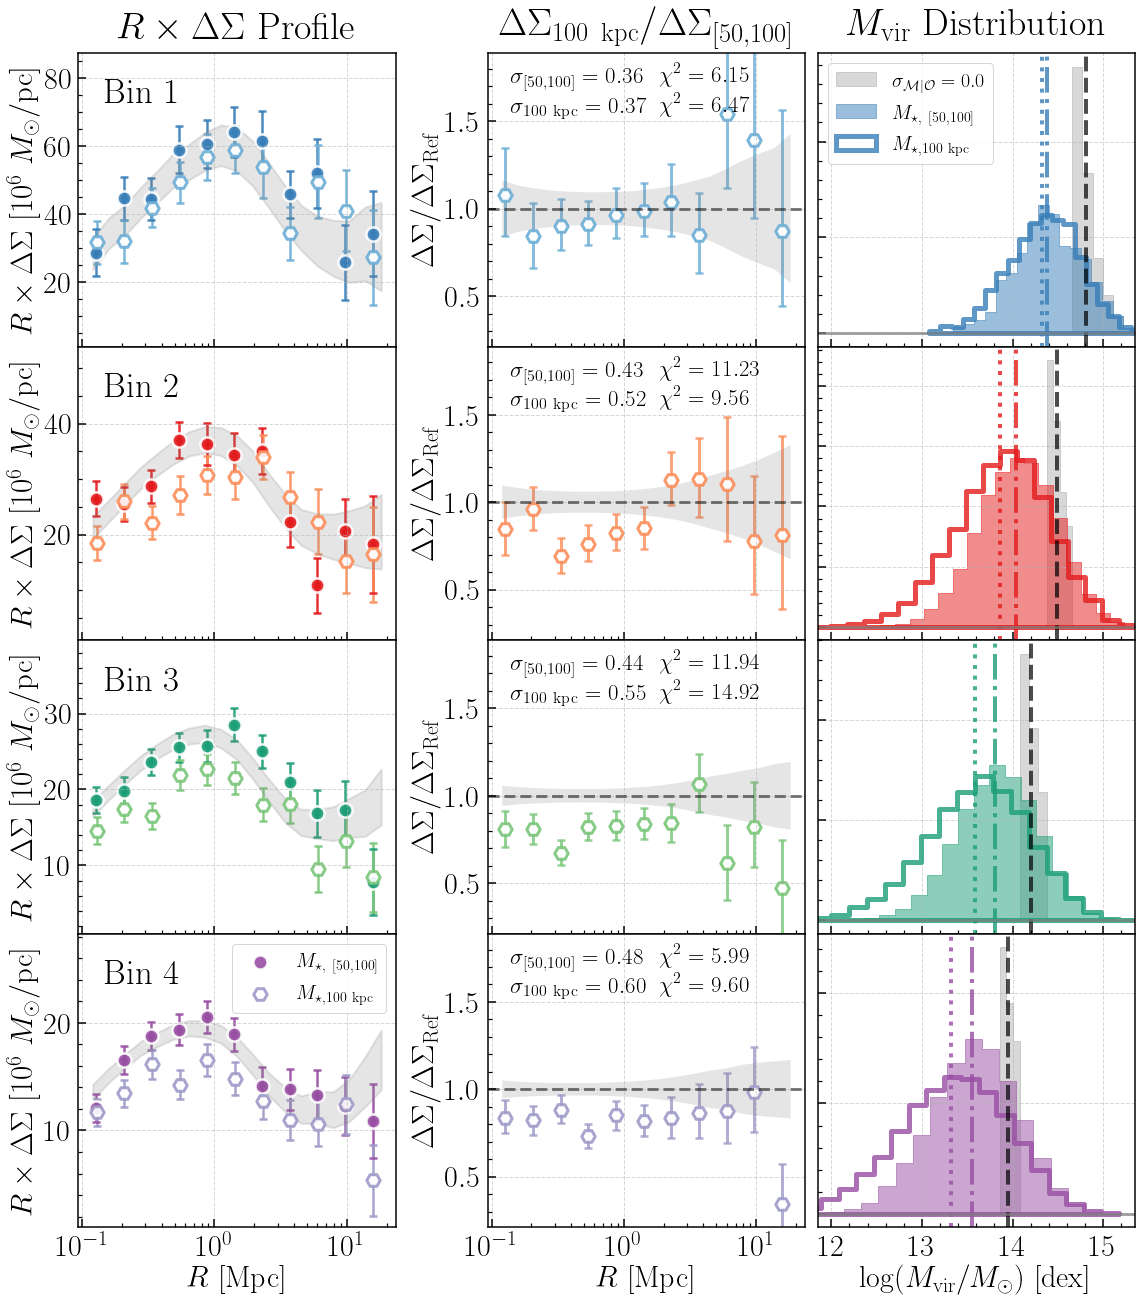

In [18]:
dsig_cmp = m100_dsig
label_cmp = r'$M_{\star,100\ \rm kpc}$'
sub_cmp = r'{100\ \rm kpc}'

dsig_ref = m50_100_dsig
label_ref = r'$M_{\star,\ [50, 100]}$'
sub_ref = r'{[50, 100]}'

fig = visual.compare_dsigma_profiles(
    dsig_ref, dsig_cmp, sim_dsig, sim_mhalo, sig_type='bt', compare_to_model=True,
    label_ref=label_ref, label_cmp=label_cmp, sub_ref=sub_ref, sub_cmp=sub_cmp,
    marker_ref='o', marker_cmp='H', msize_ref=200, msize_cmp=180,
    ratio_range=(0.21, 1.89), show_stats=True)

In [19]:
fig.savefig(os.path.join(fig_dir, 'fig_6.png'), dpi=120)
fig.savefig(os.path.join(fig_dir, 'fig_6.pdf'), dpi=120)